In [1]:
import pickle as pkl
import os 
import igraph as ig
import matplotlib.pyplot as plt
import random
import numpy as np
import collections

In [2]:
nohub = '/N/u/baotruon/Carbonate/marketplace/exps/feeds_nohub.pkl'
hub = '/N/u/baotruon/Carbonate/marketplace/exps/feeds_hub.pkl'

In [3]:
feed_nohub = pkl.load(open(nohub,'rb'))
feed_hub = pkl.load(open(hub,'rb'))

In [4]:
meme_nohub = pkl.load(open('/N/u/baotruon/Carbonate/marketplace/exps/meme_nohub.pkl','rb'))
meme_hub = pkl.load(open('/N/u/baotruon/Carbonate/marketplace/exps/meme_hub.pkl','rb'))

Calculate avg quality for hubs vs not hubs 


## Get hub ids

In [11]:
ABS_PATH = "/N/u/baotruon/Carbonate/marketplace/exps"
DATA_PATH = '/N/slate/baotruon/marketplace/data/igraph'

hub = os.path.join(DATA_PATH, 'vary_targetgamma/network_13.gml')
nohub= os.path.join(DATA_PATH, 'vary_betagamma/network_gamma0.001.gml')

hubnet = ig.Graph.Read_GML(hub)
nohubnet = ig.Graph.Read_GML(nohub)

In [ ]:
def plot_quality(ax, graph, memes, mode='in', hub_size=1000):
    degs = np.array(graph.degree(graph.vs, mode=mode))
    hub_nodes = list(np.where(degs >= hub_size)[0])
    reg_nodes = list(np.where(degs < hub_size)[0])
    # get the memes from hubs
    memes1 = [m for m in memes if m['id'] in hub_nodes]
    q1= [m['quality'] for m in memes1]
    
    memes2 = [m for m in memes if m['id'] in reg_nodes]
    q2= [m['quality'] for m in memes2]
    
    sns.kdeplot(ax=ax, data = q1, cumulative = True, label = 'hubs')
    sns.kdeplot(ax=ax, data = q2, cumulative = True, label = 'not hubs')
    ax.legend()
    ax.set_xlim([0, 1])
#     plt.show()

Text(0.5, 1.0, 'Quality')

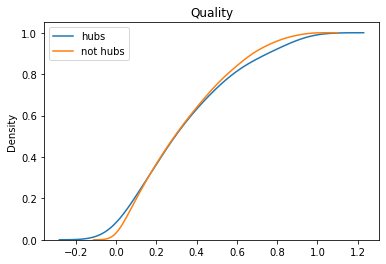

In [71]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
plot_quality(ax1, hubnet, meme_hub)
ax1.set_title('Quality (targeting hubs)')
plot_quality(ax, nohubnet, meme_nohub)
ax1.set_title('Quality (no strategy)')

Text(0.5, 1.0, 'Quality (no strategy)')

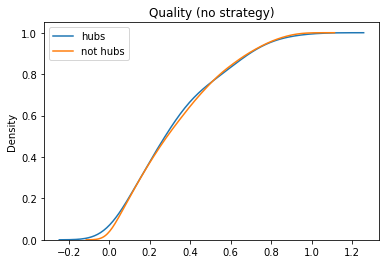

In [80]:
fig,ax = plt.subplots()


In [91]:
def plot_quality(ax, graph, memes, mode='in', hub_size=1000, complementary=True):
    degs = np.array(graph.degree(graph.vs, mode=mode))
    hub_nodes = list(np.where(degs >= hub_size)[0])
    reg_nodes = list(np.where(degs < hub_size)[0])
    # get the memes from hubs
    memes1 = [m for m in memes if m['id'] in hub_nodes]
    q1= [m['quality'] for m in memes1]
    
    memes2 = [m for m in memes if m['id'] in reg_nodes]
    q2= [m['quality'] for m in memes2]
    
    sns.ecdfplot(ax=ax, data = q1, label = 'hubs', complementary=complementary)
    sns.ecdfplot(ax=ax, data = q2, label = 'not hubs', complementary=complementary)
    ax.legend()
#     plt.show()

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
plot_quality(ax1, hubnet, meme_hub)
ax1.set_title('Quality (hubs targeting)')

plot_quality(ax2, nohubnet, meme_nohub)
ax2.set_title('Quality (no targeting)')

In [72]:
hub_degs = np.array(hubnet.degree(hubnet.vs, mode='in'))
hub_nodes = list(np.where(hub_degs>=1000)[0])
reg_nodes = list(np.where(hub_degs<1000)[0])

get the memes from hubs, 

In [73]:
hub_memes = [m for m in meme_hub if m['id'] in hub_nodes]

In [74]:
quality = [m['quality'] for m in hub_memes]

In [75]:
counterq = sorted(collections.Counter(quality).items())

In [81]:
min(x)

0

In [82]:
max(x)

0.947274908125816

In [76]:
x, y_ = zip(*counterq)
y =np.cumsum([i/sum(y_) for i in y_])

In [50]:
y

[0.0189873417721519,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.006329113924050633,
 0.0063291139

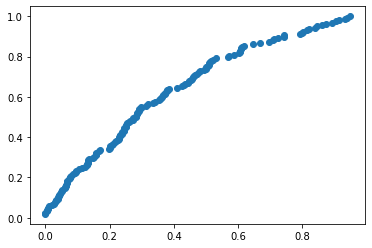

In [77]:
plt.scatter(x,y)
# plt.xscale('log')
# plt.yscale('log')

In [87]:
x, y_ = zip(*counterq)
y =reversed(np.cumsum([i/sum(y_) for i in y_]))

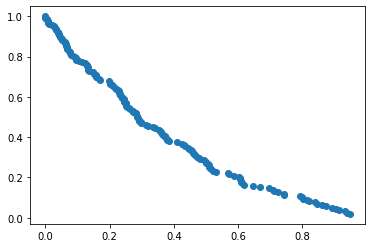

In [88]:
plt.scatter(x,list(y))

In [45]:
# !pip install seaborn

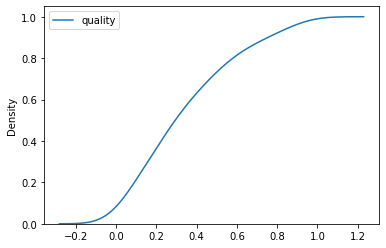

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.kdeplot(data = quality, cumulative = True, label = "quality")
plt.legend()
plt.show()

(array([0.05696203, 0.08860759, 0.13924051, 0.19620253, 0.22151899,
        0.24050633, 0.2721519 , 0.30379747, 0.32911392, 0.33544304,
        0.35443038, 0.38607595, 0.44303797, 0.48101266, 0.50632911,
        0.55063291, 0.56329114, 0.57594937, 0.58860759, 0.62658228,
        0.63924051, 0.64556962, 0.66455696, 0.6835443 , 0.71518987,
        0.7278481 , 0.76582278, 0.78481013, 0.79113924, 0.79113924,
        0.81012658, 0.82278481, 0.85443038, 0.85443038, 0.86075949,
        0.86708861, 0.87341772, 0.88607595, 0.89240506, 0.90506329,
        0.90506329, 0.91139241, 0.92405063, 0.93670886, 0.94936709,
        0.9556962 , 0.96202532, 0.97468354, 0.98101266, 1.        ]),
 array([0.        , 0.0189455 , 0.037891  , 0.05683649, 0.07578199,
        0.09472749, 0.11367299, 0.13261849, 0.15156399, 0.17050948,
        0.18945498, 0.20840048, 0.22734598, 0.24629148, 0.26523697,
        0.28418247, 0.30312797, 0.32207347, 0.34101897, 0.35996447,
        0.37890996, 0.39785546, 0.41680096, 0.

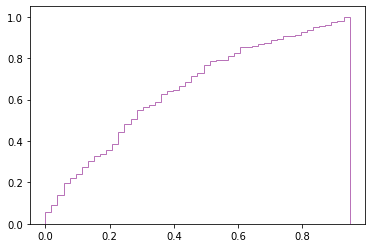

In [56]:
plt.hist(quality, bins=50, density=True,cumulative=True, label='CDF DATA', 
         histtype='step', alpha=0.55, color='purple')

In [34]:
hub_memes

[{'id': 5,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.7917253392256317,
  'fitness': 0.7917253392256317,
  'human_shares': 2,
  'bot_shares': 0,
  'qual_th': 96682,
  'share_th': 89350},
 {'id': 58,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.19834679708061975,
  'fitness': 0.19834679708061975,
  'human_shares': 4,
  'bot_shares': 0,
  'qual_th': 36671,
  'share_th': 93873},
 {'id': 233,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.8455803710885395,
  'fitness': 0.8455803710885395,
  'human_shares': 68,
  'bot_shares': 0,
  'qual_th': 98631,
  'share_th': 101026},
 {'id': 243,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.9320993296795764,
  'fitness': 0.9320993296795764,
  'human_shares': 2,
  'bot_shares': 0,
  'qual_th': 100674,
  'share_th': 89838},
 {'id': 342,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.1503777324283393,
  'fitness': 0.1503777324283393,
  'human_shares': 1,
  'bot_shares': 0,
  'qual_th': 28862,
  'share_th': 26855},
 {'id': 343,
  'is_by_bot': 0.0,


In [8]:
feed_nohub.keys()

dict_keys(['65537', '65538', '5', '32775', '98314', '32780', '131084', '14', '32789', '65561', '131099', '98339', '131107', '65576', '98350', '65585', '32822', '32823', '131129', '32828', '65', '131151', '98385', '32853', '65622', '65623', '131166', '95', '98401', '99', '131171', '101', '103', '131183', '32881', '32897', '32898', '131', '98436', '136', '32905', '32906', '131208', '32907', '32912', '98459', '98460', '98461', '98466', '65699', '131236', '98468', '131238', '169', '65711', '131250', '32947', '98487', '131258', '131261', '98494', '98493', '65730', '32962', '195', '32967', '202', '203', '32973', '65742', '32978', '215', '131289', '218', '98529', '131303', '32999', '131305', '65771', '98542', '33007', '98549', '246', '65785', '131323', '98556', '33024', '98569', '131338', '33036', '65805', '98574', '65808', '65811', '131350', '131354', '98588', '98589', '65821', '289', '33060', '294', '33066', '131374', '33072', '65843', '33081', '131387', '318', '98625', '322', '33093', '325

In [ ]:
def get_avg_quality()

In [5]:
feed_nohub

{'65537': [127839,
  127610,
  125209,
  125564,
  127211,
  100974,
  115896,
  126545,
  126833,
  126625,
  126388,
  126214,
  126189,
  100974,
  123927],
 '65538': [100974,
  125564,
  127057,
  126158,
  125434,
  126407,
  125953,
  123557,
  123557,
  125586,
  125518,
  125131,
  125464,
  120243,
  124756],
 '5': [126870,
  126617,
  100974,
  126617,
  126263,
  126371,
  117986,
  126295,
  122856,
  125329,
  123798,
  125586,
  125590,
  125518,
  125549],
 '32775': [127821,
  127810,
  127775,
  127759,
  127226,
  127674,
  127647,
  127642,
  111688,
  127184,
  127587,
  127555,
  127544,
  127184,
  127508],
 '98314': [127761,
  127552,
  127211,
  127189,
  127057,
  126960,
  125564,
  100974,
  115896,
  126617,
  125434,
  123557,
  125572,
  125976,
  125586],
 '32780': [127847,
  127838,
  127184,
  127833,
  127508,
  125572,
  127807,
  127803,
  127792,
  127650,
  125378,
  127784,
  127544,
  125572,
  127780],
 '131084': [127852,
  123982,
  127761,
  12